In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [8]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
2195,1,small_business,0.0963,385.14,11.350407,22.11,752,5550.000000,13073,16.5,0,0
2580,1,all_other,0.1537,167.27,9.680094,9.98,667,1529.958333,1101,61.2,1,0
8406,0,debt_consolidation,0.1355,271.68,11.225243,4.22,662,4559.041667,1053,40.5,7,0
8228,0,debt_consolidation,0.1292,188.48,10.308953,8.20,662,1019.041667,18718,68.1,2,1
7490,1,all_other,0.1136,263.29,11.987106,5.27,707,7200.041667,7351,94.2,1,0
6106,1,credit_card,0.1218,599.40,11.440355,10.61,722,4491.041667,28960,22.2,1,0
6452,1,debt_consolidation,0.1496,866.13,11.373663,24.19,707,10591.000000,13580,48.5,3,0
4014,1,debt_consolidation,0.1411,444.98,11.097410,17.51,682,5669.958333,22388,91.3,3,0
1080,1,debt_consolidation,0.0945,233.67,10.631036,16.52,727,3135.000000,2185,15.4,0,0
6550,1,debt_consolidation,0.0859,316.11,11.918391,15.75,757,4830.041667,42160,59.4,1,1


### Visualize/Explore Data - If You Want, You Do You

In [6]:
fico_score_notpaid = df[df['not.fully.paid'] < 1 ]
fico_score_paid = df[df['not.fully.paid'] > 0]

# doing a t-test
stat, pval = ss.ttest_ind(fico_score_notpaid['fico'],fico_score_paid['fico'])

cutoff = 0.05

if pval < cutoff:
    print("Significant difference")
else:
    print("No significant difference")






Significant difference


## Solutions

In [10]:
credit_worthy = df[df['credit.policy'] > 0]
credit_notworthy = df[df['credit.policy'] > 0]

#doing a t-test

stat,pval=ss.ttest_ind(credit_worthy['fico'],credit_notworthy['fico'])

cutoff = 0.05

if pval < cutoff:
    print("Significant difference")
else:
    print("No significant difference")



No significant difference


In [22]:
credit_worthy = df[df['credit.policy'] > 0]
credit_notworthy = df[df['credit.policy'] > 0]

#doing a t-test

stat,pval=ss.ttest_ind(credit_worthy['log.annual.inc'],credit_notworthy['log.annual.inc'])

cutoff = 0.05

if pval < cutoff:
    print("Significant difference")
else:
    print("No significant difference")

No significant difference


In [23]:
from statsmodels.stats.power import TTestPower

ces = thinkstats2.CohenEffectSize(credit_worthy['log.annual.inc'],credit_notworthy['log.annual.inc'])

powerTest = TTestPower()

n = powerTest.solve_power(ces,power=0.85,nobs=None,alpha=0.05)

c:\Users\Sandu\anaconda3\lib\site-packages\statsmodels\stats\power.py:339: HypothesisTestWarning: Warning: Effect size of 0 detected
  warnings.warn('Warning: Effect size of 0 detected', HypothesisTestWarning)


ValueError: Cannot detect an effect-size of 0. Try changing your effect-size.

In [24]:
mean_income = df['log.annual.inc'].mean()
print(mean_income)

10.932117137800155


<AxesSubplot:xlabel='log.annual.inc', ylabel='Count'>

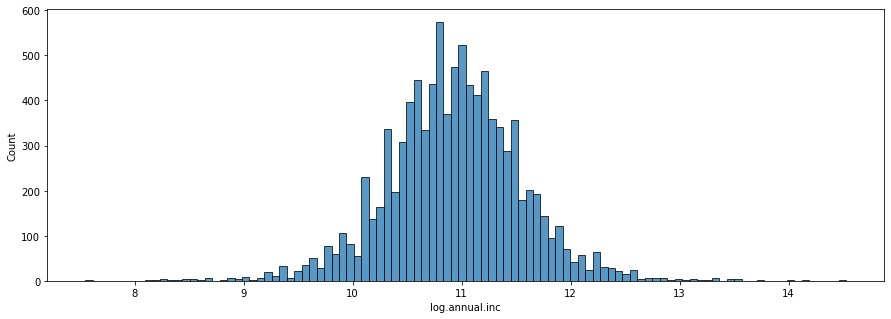

In [27]:
sns.histplot(df['log.annual.inc'])


<AxesSubplot:xlabel='days.with.cr.line', ylabel='Count'>

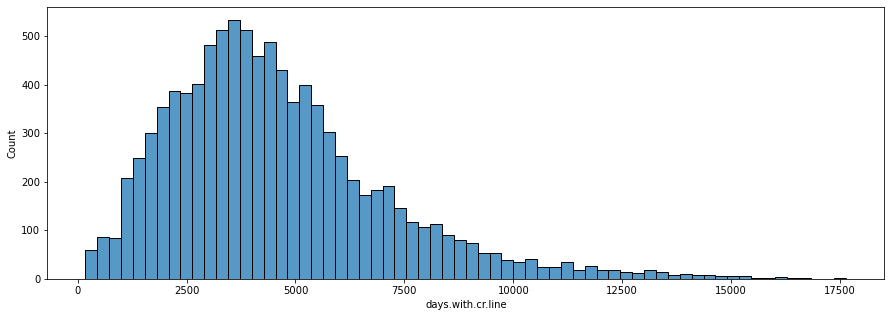

In [28]:
sns.histplot(df['days.with.cr.line'])

<AxesSubplot:xlabel='fico', ylabel='Count'>

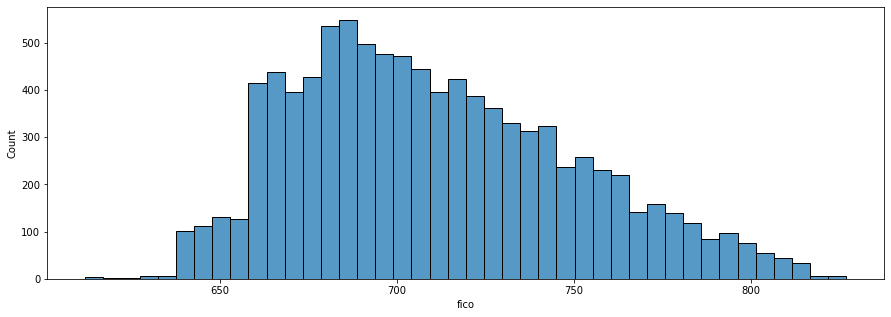

In [29]:
sns.histplot(df['fico'])